<a href="https://colab.research.google.com/github/DavidS-UNCC/ECGR_4105-Souto/blob/main/Homework_1_(David_Souto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Data retrieval

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
df = pd.read_csv(url)

In [46]:
# Data assignment

X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
y = df.values[:,3]
m = len(y)

In [70]:
# Display data

from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [71]:
# Cost computation function

def compute_cost(X, y, theta):
  '''
  Parameters:
    X: Feature matrix (m*n)
    y: Target values (m*1)
  theta: (m*1)

  Returns:
    cost (mean squared error)
  '''
  m = len(y)
  predictions = X.dot(theta)              # Preductions based on current theta
  errors = predictions - y                # Difference between predictions and actual values
  return (1/(2*m)) * np.sum(errors ** 2)  # Mean squared error

In [72]:
# Gradient discent function

def gradient_descent(X, y, theta, alpha, iterations):
  '''
  Parameters:
    X: Feature matrix (m*n)
    y: Target values (m*1)
    theta: (m*1)
    alpha: Learning rate
    iterations: # of iterations

  Returns:
    updated theta and cost history over iterations
  '''
  m = len(y)
  cost_history = np.zeros(iterations)   # Store cost for each iteration

  for i in range(iterations):
    predictions = X.dot(theta)                  # Current predictions
    errors = predictions - y                    # Difference between predictions and actual values
    theta -= (alpha / m) * X.T.dot(errors)      # Update theta using gradient descent
    cost_history[i] = compute_cost(X, y, theta) # Store current cost

  return theta, cost_history

In [73]:
# Training function for each variable

def train_single_variable(X_var, y, alpha, iterations):
  '''
  Parameters:
    X_var: Single explanatory variable (1D array)
    y: Target values
    alpha: Learning rate
    iterations: # of iterations

  Returns:
    optimized theta and cost history
  '''
  m = len(y)
  X = np.vstack((np.ones(m), X_var)).T  # Add a column of ones for the bias term
  theta = np.zeros(2)                   # Initialize theta to zeros

  # Apply gradient descent to optimize theta
  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  return theta, cost_history

In [74]:
# Set learning rate and iterations

alpha = 0.01
iterations = 1000

In [75]:
# Train each explanatory variable separately

theta1, cost_history1 = train_single_variable(X1, y, alpha, iterations)
theta2, cost_history2 = train_single_variable(X2, y, alpha, iterations)
theta3, cost_history3 = train_single_variable(X3, y, alpha, iterations)

In [76]:
# Output linear model for each variable

print(f'X1"s model: Y = {theta1[0]} + {theta1[1]} * X1')
print(f'X2"s model: Y = {theta2[0]} + {theta2[1]} * X2')
print(f'X3"s model: Y = {theta3[0]} + {theta3[1]} * X3')

X1"s model: Y = 5.2929472827573 + -1.7911907900332469 * X1
X2"s model: Y = 0.687019946445204 + 0.5766946227869245 * X2
X3"s model: Y = 2.5911866396661662 + -0.40965135041773015 * X3


In [77]:
# Plot the results for each variable

def plot_results(X_var, y, theta, cost_history, var_name, plot_color):
  '''
  Parameters:
    X_var: Explanatory variable
    y: Target values
    theta:
    cost_history: Cost values over iterations
    var_name: Name of variable

  Returns:
    plots of regression line and cost history
  '''
  plt.figure(figsize=(12, 4))

  # Plot regression line
  plt.subplot(1, 2, 1)
  plt.scatter(X_var, y, color=plot_color, marker='+')
  plt.plot(X_var, theta[0] + theta[1] * X_var, color='Black')
  plt.title(f'Regression Line for {var_name}')
  plt.xlabel(var_name)
  plt.ylabel('Y')

  # Plot cost history
  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(cost_history) + 1), cost_history)
  plt.title(f'Cost History for {var_name}')
  plt.xlabel('Iteration')
  plt.ylabel('Cost')

  plt.show()

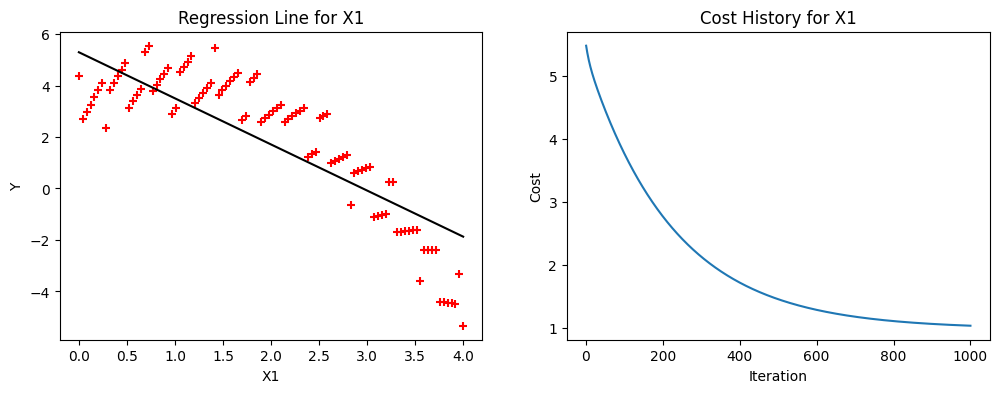

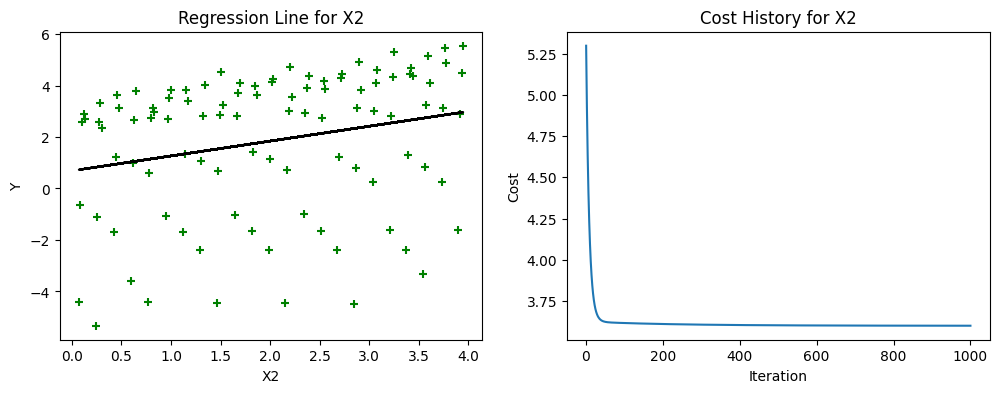

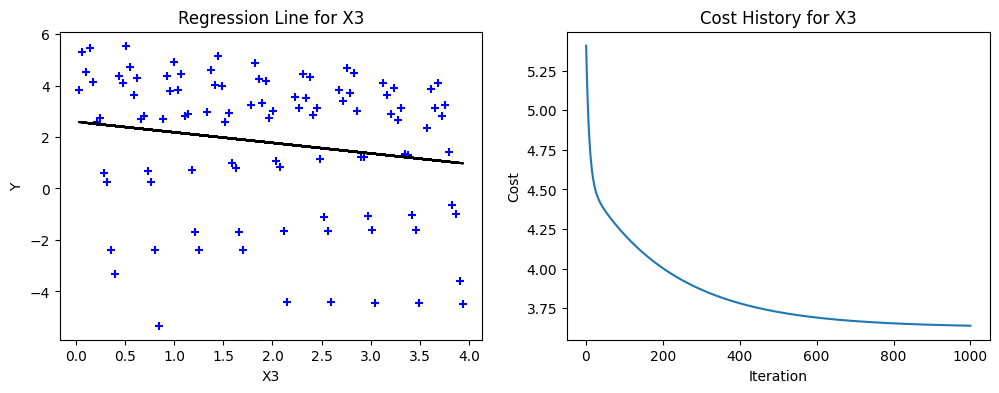

In [78]:
# Plot results for X1, X2, X3

plot_results(X1, y, theta1, cost_history1, 'X1', 'Red')
plot_results(X2, y, theta2, cost_history2, 'X2', 'Green')
plot_results(X3, y, theta3, cost_history3, 'X3', 'Blue')

In [81]:
# Compare final cost for each variable

print(f'Final cost for X1: {cost_history1[-1]}')
print(f'Final cost for X2: {cost_history2[-1]}')
print(f'Final cost for X3: {cost_history3[-1]}')

Final cost for X1: 1.0364360799429273
Final cost for X2: 3.5996728289711006
Final cost for X3: 3.6396602056308045


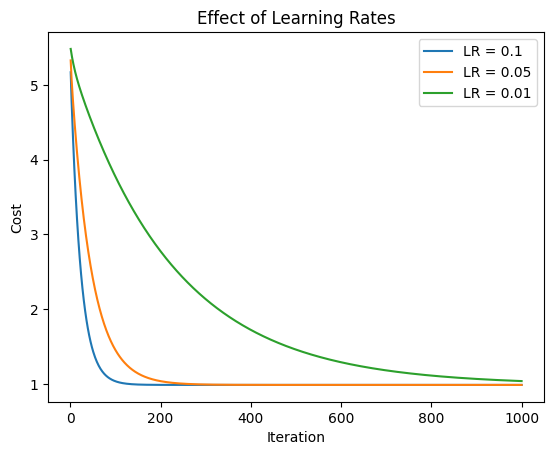

In [82]:
 # Analyze impact of different learning rates

learning_rates = [0.1, 0.05, 0.01]  # Test different learning rates
for lr in learning_rates:
    _, cost_hist_lr = train_single_variable(X1, y, lr, iterations)  # Train with each learning rate
    plt.plot(range(1, len(cost_hist_lr) + 1), cost_hist_lr, label=f'LR = {lr}')  # Plot cost

plt.title('Effect of Learning Rates')  # Title of the plot
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()  # Show the learning rate comparison plot

### **Problem 2**

In [83]:
# Feature matrix

X = np.vstack((np.ones(m), X1, X2, X3)).T # Add bias and stack all variables

In [84]:
# Train feature matrix

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

In [85]:
# Final linear model

print(f'Final linear model: Y = {theta[0]} + {theta[1]}*X1 + {theta[2]}*X2 + {theta[3]}*X3')

Final linear model: Y = 3.399297051267627 + -1.7332058216404476*X1 + 0.8489827451594735*X2 + 0.015073697283572572*X3


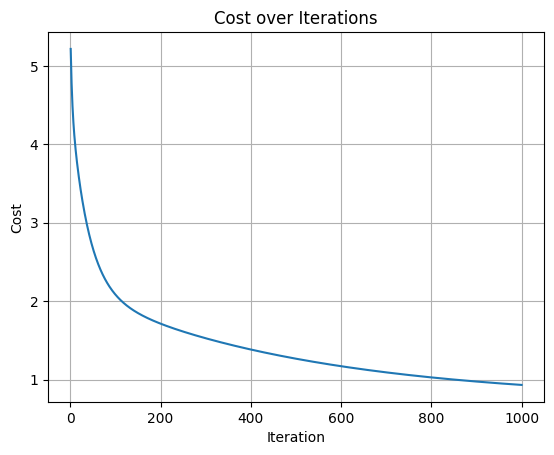

In [86]:
# Plot cost over iterations

plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.title('Cost over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

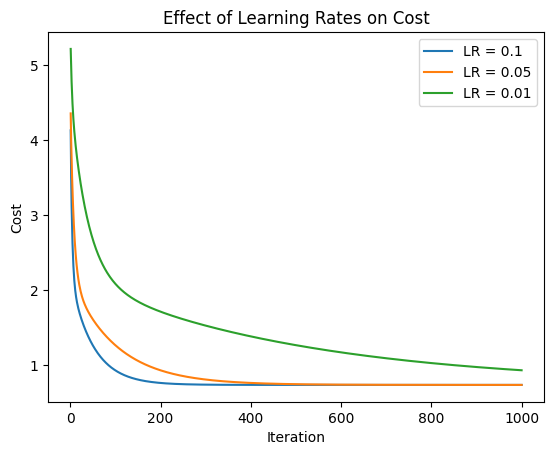

In [89]:
# Impact of different learning rates

learning_rates = [0.1, 0.05, 0.01]
for lr in learning_rates:
    theta_lr, cost_hist_lr = gradient_descent(X, y, np.zeros(4), lr, iterations)
    plt.plot(range(1, len(cost_hist_lr) + 1), cost_hist_lr, label=f'LR = {lr}')

plt.title('Effect of Learning Rates on Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [90]:
# Predictions for new X# values

new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values = np.hstack((np.ones((new_values.shape[0], 1)), new_values))  # Add column of ones
predictions = new_values.dot(theta)

for i, (x1, x2, x3) in enumerate(new_values[:, 1:]):
    print(f'Prediction for (X1, X2, X3) = ({x1}, {x2}, {x3}): {predictions[i]}')

Prediction for (X1, X2, X3) = (1.0, 1.0, 1.0): 2.5301476720702256
Prediction for (X1, X2, X3) = (2.0, 0.0, 4.0): -0.0068198028789780984
Prediction for (X1, X2, X3) = (3.0, 2.0, 1.0): -0.08728122605119637
